## INTRODUCTION

We are working as an analyst for Zuber, a new rideshare company that is launching in Chicago. Our task is to identify patterns in the available data. We want to understand passenger preferences and the impact of external factors on trips.

While working with a database, we will analyze competitor data and test a hypothesis about the impact of weather on the frequency of trips.

Theses Datasets come from the ___TrippleTen - Data Scientis Course___.

___Analysis___:
- In this case, the analysis allows for open exploration of the data.

___Hypothesis:___
- The average duration of trips from the Loop to O'Hare International Airport changes on rainy Saturdays.



## DATA DESCRIPTION

project_sql_result_01.csv contains the following data:

- ___company_name:___ the name of the taxi company.
- ___trips_amount:___ the number of trips made by each taxi company on November 15th and 16th, 2017.

project_sql_result_04.csv contains the following data:

- ___dropoff_location_name:___ the neighborhoods of Chicago where the trips ended.
- ___average_trips:___ the average number of trips that ended in each neighborhood in November 2017.

project_sql_result_07.csv contains the results from combining several databases with a weather dataset (available at this link https://practicum-content.s3.us-west-1.amazonaws.com/data-analyst-eng/moved_chicago_weather_2017.html). Using a series of queries, we have gathered data about trips from the Loop to O'Hare International Airport. The fields in the table are:

- ___start_ts:___ the date and time of pickup.
- ___weather_conditions:___ the weather conditions at the time the trip started.
- ___duration_seconds:___ the duration of the trip in seconds.

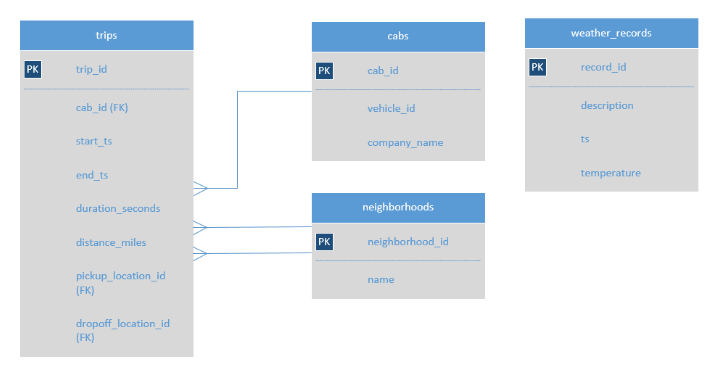

In [58]:
import pandas as pd
import numpy as np 
from scipy import stats as st
import matplotlib.pyplot as plt

In [59]:
company_trips = pd.read_csv('project_sql_result_01.csv')
dropoff_trips = pd.read_csv('project_sql_result_04.csv')
trip_details = pd.read_csv('project_sql_result_07.csv')

In [60]:
company_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [61]:
company_trips.sample(10)

,company_name,trips_amount
43,2809 - 95474 C & D Cab Co Inc.,29
4,Taxi Affiliation Service Yellow,9299
11,Globe Taxi,4383
45,3011 - 66308 JBL Cab Inc.,25
7,Sun Taxi,7701
61,5874 - 73628 Sergey Cab Corp.,5
30,Setare Inc,230
49,5074 - 54002 Ahzmi Inc,16
56,5997 - 65283 AW Services Inc.,12
58,5062 - 34841 Sam Mestas,8


In [62]:
dropoff_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [63]:
dropoff_trips.sample(10)

,dropoff_location_name,average_trips
90,Hegewisch,3.117647
39,Jefferson Park,74.333333
43,Mckinley Park,64.033333
87,Pullman,3.896552
54,North Lawndale,32.166667
50,South Shore,40.533333
13,Uptown,849.666667
68,Clearing,14.500000
33,Portage Park,119.733333
89,Mount Greenwood,3.137931


In [64]:
trip_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [65]:
trip_details.sample(10)

,start_ts,weather_conditions,duration_seconds
590,2017-11-04 12:00:00,Good,2460.0
175,2017-11-04 14:00:00,Good,3060.0
139,2017-11-25 13:00:00,Good,1560.0
734,2017-11-25 14:00:00,Good,1828.0
787,2017-11-04 08:00:00,Good,1406.0
233,2017-11-04 18:00:00,Bad,2580.0
866,2017-11-18 07:00:00,Bad,1320.0
537,2017-11-11 10:00:00,Good,1432.0
503,2017-11-11 17:00:00,Good,2100.0
708,2017-11-18 11:00:00,Good,2178.0


Remarks
- None of the tables have missing or duplicate data.
- The data types match their respective column values, except for the start_ts in trip_details.
- The values in the company_trips and dropoff_trips tables are already sorted in descending order.

## PRE-PROCESSING

In [66]:
# Correcting Datatypes
trip_details['start_ts']= trip_details['start_ts'].astype('datetime64[ns]')

## DATA ANALYST

<Axes: title={'center': 'Top 10 average trips per location'}, xlabel='Locations', ylabel='Average trips'>

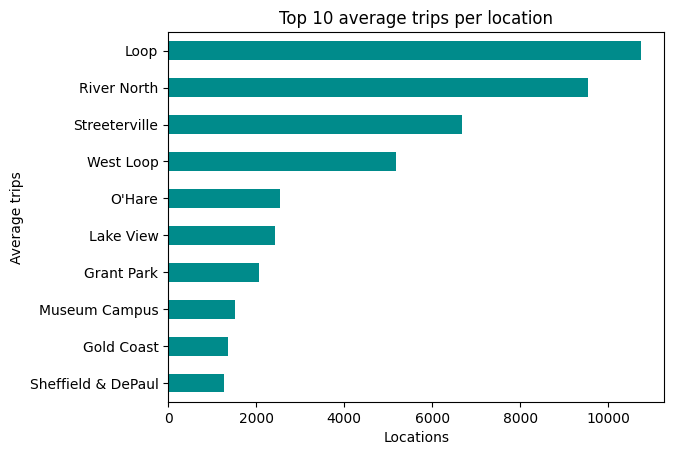

In [67]:
# Top 10 most chosen destinations 
top_10_locations = dropoff_trips.head(10).sort_values(by='average_trips')

top_10_locations.plot(x='dropoff_location_name',
                      y='average_trips',
                      xlabel='Locations',
                      ylabel='Average trips',
                      kind='barh',
                      title='Top 10 average trips per location',
                      legend = False,
                      color='darkcyan'
                     )

Remarks

- Loop is the most frequently recorded popular destination.
- The four most relevant destinations are: Loop, River North, Streeterville, and West Loop.

The average number of trips across all companies 2145.48


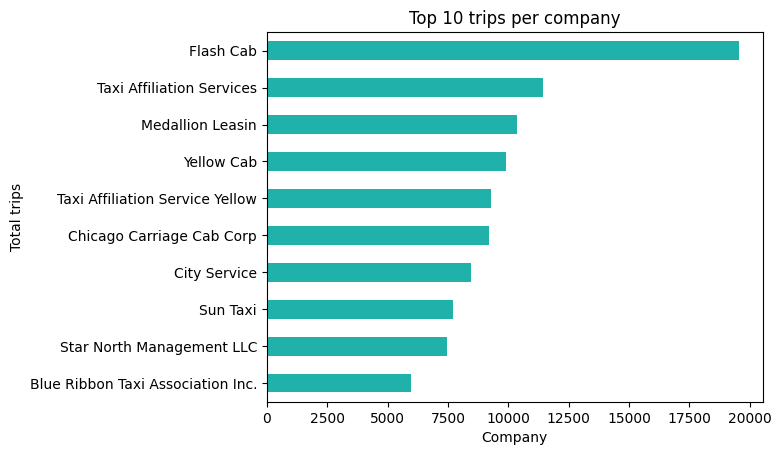

In [68]:
# Most popular companies
top_10_companies = company_trips.head(10).sort_values(by='trips_amount')

top_10_companies.plot(x='company_name',
                      y='trips_amount',
                      xlabel='Company',
                      ylabel='Total trips',
                      kind='barh',
                      title='Top 10 trips per company',
                      legend = False,
                      color='lightseagreen'
                     )
trips_mean = round(company_trips['trips_amount'].mean(),2)

print('The average number of trips across all companies {}'.format(trips_mean) )

Remarks

- Flash Cab is the company with the highest number of recorded trips.
- The top 10 companies have trip counts that are more than double the overall average number of trips.

## HYPOTHESIS

The average duration of trips from the Loop to O'Hare International Airport changes on rainy Saturdays.

In [69]:
good_days = trip_details[trip_details['weather_conditions'] == 'Good' ]['duration_seconds']
bad_days = trip_details[trip_details['weather_conditions'] == 'Bad' ]['duration_seconds']

Var: 575732.9308497686


Text(0.5, 1.0, 'Histogram of Good Days')

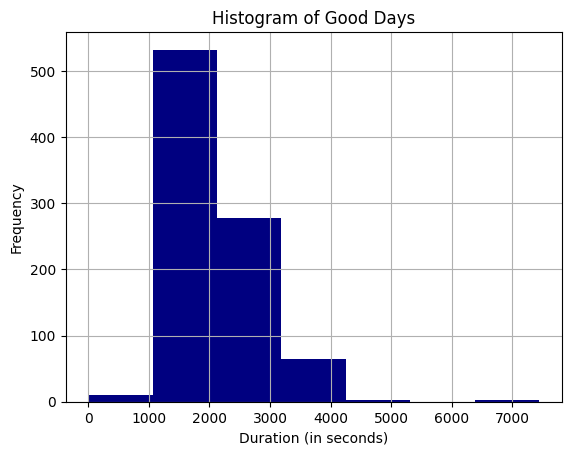

In [70]:
good_var = np.var(good_days)
print('Var: {}'.format(good_var))
good_days.hist(bins = 7, color='navy')

plt.xlabel('Duration (in seconds)')  # Replace with appropriate label for your x-axis
plt.ylabel('Frequency')  # Replace with appropriate label for your y-axis
plt.title('Histogram of Good Days')  # Replace with an appropriate title for your histogram

Var: 517403.56330246915


Text(0.5, 1.0, 'Histogram of Good Days')

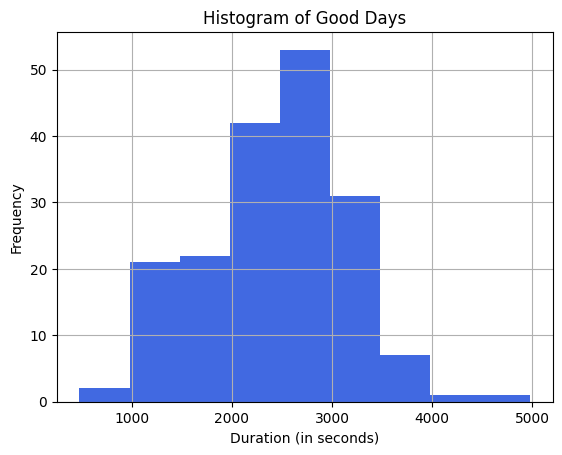

In [71]:
#Mostramos la distribución de los días malos
bad_var = np.var(bad_days)
print('Var: {}'.format(bad_var))

bad_days.hist(bins=9,color='royalblue')

plt.xlabel('Duration (in seconds)')  # Replace with appropriate label for your x-axis
plt.ylabel('Frequency')  # Replace with appropriate label for your y-axis
plt.title('Histogram of Good Days')  # Replace with an appropriate title for your histogram

In [72]:
#Prueba de hipótesis
# Null Hypothesis (H₀): The average duration of trips from the Loop to O'Hare International Airport does not change on rainy Saturdays.
# Alternative Hypothesis (H₁): The average duration of trips from the Loop to O'Hare International Airport changes on rainy Saturdays.

alpha = 0.05
results = st.ttest_ind(good_days, bad_days, equal_var = False) 

print('valor p: ', results.pvalue, '\n')

if results.pvalue < alpha:
    print("Reject the null hypothesis: The average duration of trips from the Loop to O'Hare International Airport does not change on rainy Saturdays.")
else:
    print("We cannot reject the null hypothesis: The average duration of trips from the Loop to O'Hare International Airport changes on rainy Saturdays.")

valor p:  6.738994326108734e-12 

Reject the null hypothesis: The average duration of trips from the Loop to O'Hare International Airport does not change on rainy Saturdays.


## FINAL CONCLUTION

- The t-test for means was used to determine if there is a significant difference, using an alpha of 0.05.
- As we can see from the graphs and the test results, the average duration of trips is indeed affected by rainy or bad weather days. This can be attributed to factors such as increased traffic during rain or the reduced speed of movement for safety reasons.

